In [ ]:
!pip install librosa scikit-learn matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/Clustering/AudioDigits/recordings
%ls

In [ ]:
import os
import librosa
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def extract_features(audio_file, max_pad_length=173):
    y, sr = librosa.load(audio_file)
    mels = librosa.feature.melspectrogram(y=y, sr=sr)
    pad_width = max_pad_length - mels.shape[1]
    if pad_width < 0:
        mels = mels[:, :max_pad_length]
    else:
        mels = np.pad(mels, pad_width=((0, 0), (0, pad_width)), mode='constant')
    return mels.flatten()

In [ ]:
# Directory containing your .wav files
audio_dir = './'

# Process all files and extract features
features = []
file_names = []
for file in os.listdir(audio_dir):
    print(file)
    if file.endswith('.wav'):
        file_path = os.path.join(audio_dir, file)
        file_names.append(file)
        features.append(extract_features(file_path))

# Convert to a numpy array for clustering
features = np.array(features)



In [ ]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


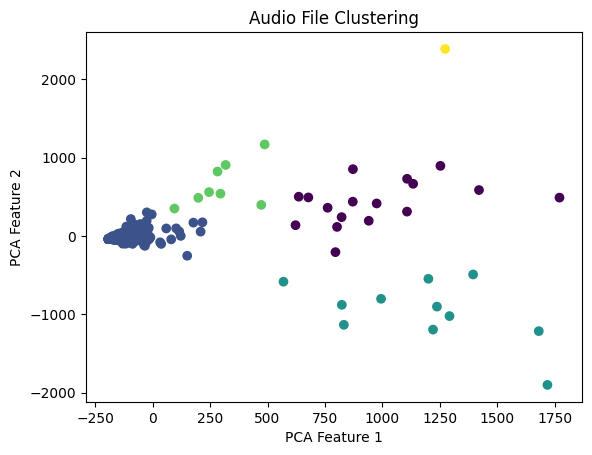

0_george_0.wav: Cluster 1
0_george_10.wav: Cluster 1
0_george_18.wav: Cluster 1
0_george_15.wav: Cluster 1
0_george_11.wav: Cluster 1
0_george_14.wav: Cluster 1
0_george_1.wav: Cluster 1
0_george_12.wav: Cluster 1
0_george_19.wav: Cluster 1
0_george_17.wav: Cluster 1
0_george_16.wav: Cluster 1
0_george_13.wav: Cluster 1
0_george_24.wav: Cluster 1
0_george_21.wav: Cluster 1
0_george_27.wav: Cluster 1
0_george_25.wav: Cluster 1
0_george_22.wav: Cluster 1
0_george_23.wav: Cluster 1
0_george_20.wav: Cluster 1
0_george_28.wav: Cluster 1
0_george_29.wav: Cluster 1
0_george_2.wav: Cluster 1
0_george_26.wav: Cluster 1
0_george_3.wav: Cluster 1
0_george_32.wav: Cluster 1
0_george_36.wav: Cluster 1
0_george_31.wav: Cluster 1
0_george_37.wav: Cluster 1
0_george_34.wav: Cluster 1
0_george_33.wav: Cluster 1
0_george_38.wav: Cluster 1
0_george_39.wav: Cluster 1
0_george_35.wav: Cluster 1
0_george_30.wav: Cluster 1
0_george_43.wav: Cluster 1
0_george_7.wav: Cluster 1
0_george_41.wav: Cluster 1
0_geor

In [ ]:
# Clustering
kmeans = KMeans(n_clusters=5)  # Modify the number of clusters as needed
clusters = kmeans.fit_predict(reduced_features)

# Visualization
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Audio File Clustering')
plt.show()

# Output cluster for each file
for file, cluster in zip(file_names, clusters):
    print(f'{file}: Cluster {cluster}')